In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
# from scipy.interpolate import interp1d
import lal

mplparams = {
    'text.usetex': True,  # use LaTeX for all text
    'axes.linewidth': 1,  # set axes linewidths to 0.5
    'axes.grid': False,  # add a grid
    'axes.labelweight': 'normal',
    'font.family': 'serif',
    'font.size': 24,
    'font.serif': 'Computer Modern Roman'
}
matplotlib.rcParams.update(mplparams)

In [2]:
# Define function for string formatting of scientific notation
def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if not exponent:
        exponent = int(np.floor(np.log10(abs(num))))
    coeff = round(num / float(10**exponent), decimal_digits)
    if not precision:
        precision = decimal_digits
    if coeff == 1.:
        return r"$~~~10^{%d}$" % exponent 
    return r"${0:.{2}f}\times10^{{{1:d}}}$".format(coeff, exponent, precision)

Reference values:

In [7]:
import pandas as pd
df = pd.read_hdf('examples_design.h5', key='table')

In [13]:
# reference tdrifts (days)
td_ref = df['tdrift'].values / lal.DAYJUL_SI
# horizon at reference tdrift (Mpc)
nifo = 1
d_ref = np.sqrt(nifo)*df['H_design'].values
# reference computing cost (CPU days)
c_ref = [5*1E3]*len(d_ref)  # 5 days in 1k cores

Plot:

In [14]:
def fd_from_td(Td_days):
    Td = Td_days * 24 * 60 * 60
    return 1./(2.*Td**2)

def td_from_fd(fd):
    Td = (2.*fd)**(-0.5)
    return Td / (24 * 60 * 60.)
    
def tick_function(Td_days):
    fds = fd_from_td(Td_days)
    return  [sci_notation(fd) for fd in fds]

In [15]:
from matplotlib import cm

cs = [cm.magma(x) for x in np.linspace(0.1, 0.8, len(d_ref))]
lws = np.linspace(2, 6, len(d_ref))

/Users/maxisi/custompy/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


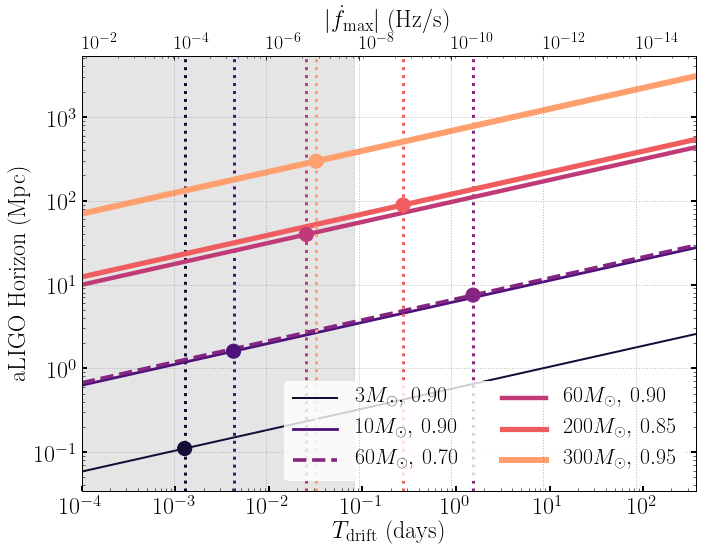

In [16]:
tdrifts = np.linspace(1E-4, 365, 1000)
# c_marks = np.array([5., 30., 100, 200])*1E3
f_marks = 10.**np.arange(-14, -1, 2)#np.logspace(-9, -15, 4)
t_marks = td_from_fd(f_marks)  #np.array([1, 50, 150, 300])

labels = [
    r'$3M_\odot,\, 0.90$',
    r'$10M_\odot,\, 0.90$',
    r'$60M_\odot,\, 0.70$',
    r'$60M_\odot,\, 0.90$',
    r'$200M_\odot,\, 0.85$',
    r'$300M_\odot,\, 0.95$',
]

# lylocs = np.array([0.6, 8, 30, 180, 600, 1.5E3]) * np.sqrt(nifo) / np.sqrt(3)
props = [0.7, 1.5, 0.7, 1.2, 0.7, 0.7]

fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111)
ax2 = ax.twiny()

for i, d0 in enumerate(d_ref):
    # rescale horizon
    ds = d0 * (tdrifts / td_ref[i])**0.25
    # get label locations
#     dinterp = interp1d(tdrifts, ds)
#     lyloc = props[i]*dinterp(330)
    ls = '--' if i==2 else '-'
    ax.plot(tdrifts, ds, lw=lws[i], c=cs[i], ls=ls, label=labels[i])
    ax.axvline(td_ref[i], c=cs[i], ls=':', lw=3)
#     ax.annotate(labels[i], xy=(300, lyloc),  xycoords='data',
#                 xytext=(330, lyloc), textcoords='data', horizontalalignment='center',
#                 verticalalignment='center', fontsize=20, color=cs[i])
ax.scatter(td_ref, d_ref, marker='o', c=cs, s=200, zorder=300)#, edgecolor='0.8', linewidth=0.5)


ax.set_xscale('log')
ax2.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(tdrifts[0], 365)
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(t_marks)
tlabels = tick_function(t_marks)
ax2.set_xticklabels(tlabels, fontsize=20, horizontalalignment='left')
# ax2.get_xaxis().set_tick_params(which='both', labelrotation=10)
# ax2.tick_params(axis=u'both', which=u'both', length=0)
ax2.set_xlabel(r"$|\dot{f}_\mathrm{max}|$ (Hz/s)")
ax2.grid('major', ls=':', color='gray', lw=1, alpha=0.5)
ax2.tick_params(which='both', direction='in')
# for tm in t_marks:
#     ax.axvline(tm, ls=':', c='gray')

ax.set_xlabel(r'$T_\mathrm{drift}$ (days)')
if nifo==1:
    ax.set_ylabel('aLIGO Horizon (Mpc)')
else:
    ax.set_ylabel('Horizon for %i aLIGO design IFOs (Mpc)' % nifo)

ax.yaxis.grid(which='major', ls=':', color='gray', lw=1, alpha=0.5)
ax.tick_params(which='both', left=True, right=True, direction='in')
ax.tick_params(which='major', width=2, length=5)
ax.tick_params(which='minor', length=3)
ax.legend(ncol=2, fontsize=22, frameon=True, edgecolor='w', loc='lower right')#, title=r'$(M_i,\,\chi_i)$')

ax.axvspan(1E-4, td_from_fd(1E-8), alpha=0.2, color='gray')

fig.savefig('horizon_scaling.pdf', bbox_inches='tight')
plt.show()

# Vectors

In [77]:
scalar_td, scalar_horizon = td_ref[2], d_ref[2]
scalar_fdot = fd_from_td(scalar_td)

vector_to_scalar_amplitude_ratio = 4E-24 / 8E-28  # *(alpha / 0.1)**(-2)
vector_to_scalar_fdot_ratio = 1E-6 / 3E-14 # *(alpha/0.1)**(-4)

vector_fdot = vector_to_scalar_fdot_ratio * scalar_fdot
vector_td = td_from_fd(vector_fdot)

vector_to_scalar_td_ratio = vector_td / scalar_td

scalar_to = 365.
vector_to = 1.  # 1 day
vector_to_scalar_to_ratio = vector_to / scalar_to

vector_horizon = scalar_horizon * vector_to_scalar_amplitude_ratio *\
                 (vector_to_scalar_td_ratio*vector_to_scalar_to_ratio)**0.25

print '%.1f' % vector_horizon
print '%.1f' % (vector_to * (24 * 60 * 60.))

1574.8
86400.0


In [59]:
print '%.1e' % vector_to_scalar_amplitude_ratio
print '%.1e' % (vector_to_scalar_td_ratio)
print '%.1e' % (vector_to_scalar_fdot_ratio)

5.0e+03
1.7e-04
3.3e+07
